<img style="float: right;" src="fig/unifor.jpg" width="250px">

# Introdução ao Aprendizado de Máquina

MBA em Ciência de Dados<br>
Prof. Erneson A. Oliveira<br>
Universidade de Fortaleza<br>
Claudio Comunale Filho

# 1. Projeto: Análise dos Sálarios Jogadores NBA

<center>
<img src="fig/time.jpg" width="800px">

<center>
<h1>O salário do Stephen Curry é justo? </h1>
</center>

## 1.1 Obtendos dados/ limpeza e transformação

In [1]:
import pandas as pd
import numpy as np  

In [2]:
# Carregando o arquivo
df = pd.read_csv("NBA_Players.csv",sep=',',encoding='utf-8')

In [3]:
# copia do dataset
df_nba = df.copy()

In [4]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 30 columns):
TEAM                550 non-null object
 NAME               550 non-null object
 EXPERIENCE         550 non-null int64
 URL                550 non-null object
 POSITION           550 non-null object
 AGE                550 non-null object
 HT                 550 non-null float64
 WT                 550 non-null float64
 COLLEGE            550 non-null object
 SALARY             550 non-null object
 PPG_LAST_SEASON    538 non-null float64
 APG_LAST_SEASON    538 non-null float64
 RPG_LAST_SEASON    538 non-null float64
 PER_LAST_SEASON    538 non-null float64
 PPG_CAREER         550 non-null float64
 APG_CAREER         550 non-null float64
 RGP_CAREER         550 non-null float64
 GP                 550 non-null int64
 MPG                550 non-null float64
 FGM_FGA            550 non-null object
 FGP                550 non-null float64
 THM_THA            550 non-null object
 THP  

In [5]:
df_nba.describe().T

,count,mean,std,min,25%,50%,75%,max
EXPERIENCE,550.0,4.018182,4.144876,0.00,1.00000,3.0000,6.00000,20.00
HT,550.0,200.512218,8.592139,175.26,193.67500,200.6600,208.28000,220.98
WT,550.0,98.371255,10.883866,76.92,90.50000,97.2900,106.33000,131.22
PPG_LAST_SEASON,538.0,7.316171,6.625138,0.00,1.00000,6.1500,11.70000,30.40
APG_LAST_SEASON,538.0,2.667472,2.809521,0.00,0.20000,1.9000,4.20000,16.00
RPG_LAST_SEASON,538.0,1.727881,1.861049,0.00,0.00000,1.1000,2.87500,12.30
PER_LAST_SEASON,538.0,10.870725,9.382982,-28.48,3.74500,12.1050,15.87750,133.95
PPG_CAREER,550.0,6.944545,5.912676,0.00,1.50000,6.4000,10.50000,27.20
APG_CAREER,550.0,2.622182,2.665679,0.00,0.30000,1.8000,4.10000,13.40
RGP_CAREER,550.0,1.708182,1.732489,0.00,0.12500,1.2000,2.80000,11.70


In [6]:
df_nba.head(5).T

,0,1,2,3,4
TEAM,Boston Celtics,Boston Celtics,Boston Celtics,Boston Celtics,Boston Celtics
NAME,Aron Baynes,Justin Bibbs,Jabari Bird,Jaylen Brown,PJ Dozier
EXPERIENCE,6,0,1,2,1
URL,http://www.espn.com/nba/player/_/id/2968439,http://www.espn.com/nba/player/_/id/3147500,http://www.espn.com/nba/player/_/id/3064308,http://www.espn.com/nba/player/_/id/3917376,http://www.espn.com/nba/player/_/id/3923250
POSITION,SF,G,SG,F,PG
AGE,31,22,24,21,21
HT,208.28,195.58,198.12,200.66,198.12
WT,117.65,99.55,89.59,99.55,92.76
COLLEGE,Washington State,Virginia Tech,California,California,South Carolina
SALARY,"5,193,600",Not signed,"1,349,464","5,169,960",Not signed


In [7]:
# Retirar os espaços das colunas
df_nba.columns = df_nba.columns.str.replace(' ', '') 

In [8]:
df_nba.columns

Index(['TEAM', 'NAME', 'EXPERIENCE', 'URL', 'POSITION', 'AGE', 'HT', 'WT',
       'COLLEGE', 'SALARY', 'PPG_LAST_SEASON', 'APG_LAST_SEASON',
       'RPG_LAST_SEASON', 'PER_LAST_SEASON', 'PPG_CAREER', 'APG_CAREER',
       'RGP_CAREER', 'GP', 'MPG', 'FGM_FGA', 'FGP', 'THM_THA', 'THP',
       'FTM_FTA', 'FTP', 'APG', 'BLKPG', 'STLPG', 'TOPG', 'PPG'],
      dtype='object')

In [9]:
# separar as colunas FGM_FGA, THM_THA, FTM_FTA, pois consta duas informações na mesma coluna
df_nba = df_nba.join(df_nba['FGM_FGA'].str.split('-', expand=True).rename(columns={0:'FGM', 1:'FGA'}))
df_nba = df_nba.join(df_nba['THM_THA'].str.split('-', expand=True).rename(columns={0:'THM', 1:'THA'}))
df_nba = df_nba.join(df_nba['FTM_FTA'].str.split('-', expand=True).rename(columns={0:'FTM', 1:'FTA'}))

In [10]:
# excluido colunas depois de separadas.
df_nba.drop(['FGM_FGA','THM_THA','FTM_FTA'], axis=1, inplace=True)

In [11]:
df_nba.head(5).T

,0,1,2,3,4
TEAM,Boston Celtics,Boston Celtics,Boston Celtics,Boston Celtics,Boston Celtics
NAME,Aron Baynes,Justin Bibbs,Jabari Bird,Jaylen Brown,PJ Dozier
EXPERIENCE,6,0,1,2,1
URL,http://www.espn.com/nba/player/_/id/2968439,http://www.espn.com/nba/player/_/id/3147500,http://www.espn.com/nba/player/_/id/3064308,http://www.espn.com/nba/player/_/id/3917376,http://www.espn.com/nba/player/_/id/3923250
POSITION,SF,G,SG,F,PG
AGE,31,22,24,21,21
HT,208.28,195.58,198.12,200.66,198.12
WT,117.65,99.55,89.59,99.55,92.76
COLLEGE,Washington State,Virginia Tech,California,California,South Carolina
SALARY,"5,193,600",Not signed,"1,349,464","5,169,960",Not signed


In [12]:
# substituindo "Not Signed" da coluna SALARY por NAN
df_nba.replace("Not signed",np.NAN, inplace=True)

In [13]:
# retirar a virgula do salario e converter para float e verificando as 10 primeiras alterações
df_nba['SALARY'] = df_nba['SALARY'].str.replace(',','').astype(float)

In [14]:
# Transformando a notação cientifica
pd.options.display.float_format = '{:.1f}'.format

In [15]:
df_nba.head(5).T

,0,1,2,3,4
TEAM,Boston Celtics,Boston Celtics,Boston Celtics,Boston Celtics,Boston Celtics
NAME,Aron Baynes,Justin Bibbs,Jabari Bird,Jaylen Brown,PJ Dozier
EXPERIENCE,6,0,1,2,1
URL,http://www.espn.com/nba/player/_/id/2968439,http://www.espn.com/nba/player/_/id/3147500,http://www.espn.com/nba/player/_/id/3064308,http://www.espn.com/nba/player/_/id/3917376,http://www.espn.com/nba/player/_/id/3923250
POSITION,SF,G,SG,F,PG
AGE,31,22,24,21,21
HT,208.3,195.6,198.1,200.7,198.1
WT,117.7,99.5,89.6,99.5,92.8
COLLEGE,Washington State,Virginia Tech,California,California,South Carolina
SALARY,5193600.0,NaN,1349464.0,5169960.0,NaN


In [16]:
# removendo linhas com numeros negativos da coluna PER_LAST_SEASON
df_nba.drop(df_nba[df_nba.PER_LAST_SEASON < 0].index, inplace=True)

In [17]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 549
Data columns (total 33 columns):
TEAM               545 non-null object
NAME               545 non-null object
EXPERIENCE         545 non-null int64
URL                545 non-null object
POSITION           545 non-null object
AGE                545 non-null object
HT                 545 non-null float64
WT                 545 non-null float64
COLLEGE            545 non-null object
SALARY             439 non-null float64
PPG_LAST_SEASON    533 non-null float64
APG_LAST_SEASON    533 non-null float64
RPG_LAST_SEASON    533 non-null float64
PER_LAST_SEASON    533 non-null float64
PPG_CAREER         545 non-null float64
APG_CAREER         545 non-null float64
RGP_CAREER         545 non-null float64
GP                 545 non-null int64
MPG                545 non-null float64
FGP                545 non-null float64
THP                545 non-null float64
FTP                545 non-null float64
APG                545 no

In [18]:
#Verificando numeros ausentes 
df_nba.isnull().sum()

TEAM                 0
NAME                 0
EXPERIENCE           0
URL                  0
POSITION             0
AGE                  0
HT                   0
WT                   0
COLLEGE              0
SALARY             106
PPG_LAST_SEASON     12
APG_LAST_SEASON     12
RPG_LAST_SEASON     12
PER_LAST_SEASON     12
PPG_CAREER           0
APG_CAREER           0
RGP_CAREER           0
GP                   0
MPG                  0
FGP                  0
THP                  0
FTP                  0
APG                  0
BLKPG                0
STLPG                0
TOPG                 0
PPG                  0
FGM                  0
FGA                123
THM                  0
THA                123
FTM                  0
FTA                123
dtype: int64

In [19]:
# Removendo dados missing
df_nba.dropna(axis=0, inplace= True)

In [20]:
# Converter colunas para float
df_nba['AGE'] = df_nba['AGE'].astype(float)
df_nba['EXPERIENCE'] = df_nba['EXPERIENCE'].astype(float)
df_nba['GP'] = df_nba['GP'].astype(float)
df_nba['FTA'] = df_nba['FTA'].astype(float)
df_nba['THA'] = df_nba['THA'].astype(float)
df_nba['FGA'] = df_nba['FGA'].astype(float)
df_nba['FGM'] = df_nba['FGM'].astype(float)
df_nba['THM'] = df_nba['THM'].astype(float)
df_nba['FTM'] = df_nba['FTM'].astype(float)

In [21]:
# verificando as categorias de POSITION
df_nba['POSITION'].value_counts()

SG    88
PF    86
PG    80
SF    71
C     52
F      4
G      2
Name: POSITION, dtype: int64

In [22]:
# Removendo nomes duplicados se houverem
df_nba.drop_duplicates(['NAME'], inplace=True)

In [23]:
# confirmar se existe no data frame Stephen Curry
df_nba.loc[df_nba['NAME'] == 'Stephen Curry']

,TEAM,NAME,EXPERIENCE,URL,POSITION,AGE,HT,WT,COLLEGE,SALARY,...,BLKPG,STLPG,TOPG,PPG,FGM,FGA,THM,THA,FTM,FTA
103,Golden State Warriors,Stephen Curry,9.0,http://www.espn.com/nba/player/_/id/3975,PG,30.0,190.5,86.0,Davidson,37457154.0,...,0.2,1.8,3.2,23.1,8.0,16.8,3.4,7.8,3.6,4.0


In [24]:
# Gravar em uma variavel dados do Stephen Curry, para posterior previsao do salario
stephen = (df_nba.loc[df_nba['NAME'] == 'Stephen Curry']).copy()

In [25]:
# Excluindo Stpehen Curry para prever seu salario
df_nba.drop(df_nba.loc[df_nba['NAME'] == 'Stephen Curry'].index, inplace=True)

In [26]:
df_nba.drop(['TEAM', 'NAME','URL','HT','WT','COLLEGE'], axis=1, inplace=True)

In [27]:
# Fazendo copoia do dataset limpo
nba = df_nba.copy()

In [28]:
nba.columns

Index(['EXPERIENCE', 'POSITION', 'AGE', 'SALARY', 'PPG_LAST_SEASON',
       'APG_LAST_SEASON', 'RPG_LAST_SEASON', 'PER_LAST_SEASON', 'PPG_CAREER',
       'APG_CAREER', 'RGP_CAREER', 'GP', 'MPG', 'FGP', 'THP', 'FTP', 'APG',
       'BLKPG', 'STLPG', 'TOPG', 'PPG', 'FGM', 'FGA', 'THM', 'THA', 'FTM',
       'FTA'],
      dtype='object')

In [29]:
#  Histograma para analisar a distribuicao das variaveis
nba_hist=nba.hist(bins=50, figsize=(20,15))

### Verificando a Correlação entre as variáveis

In [30]:
# Importando os módulos    
import matplotlib as mat
import matplotlib.pyplot as plt    
import sklearn as sk
%matplotlib inline  

In [31]:
# Função para Correlção entre as varíaveis
def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr) 
    ax = plt.gca()
    ax.set_xticks(range(len(corr.columns)))
    ax.set_yticks(range(len(corr.columns)))
    ax.set_xticklabels(corr.columns)
    ax.set_yticklabels(corr.columns)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")

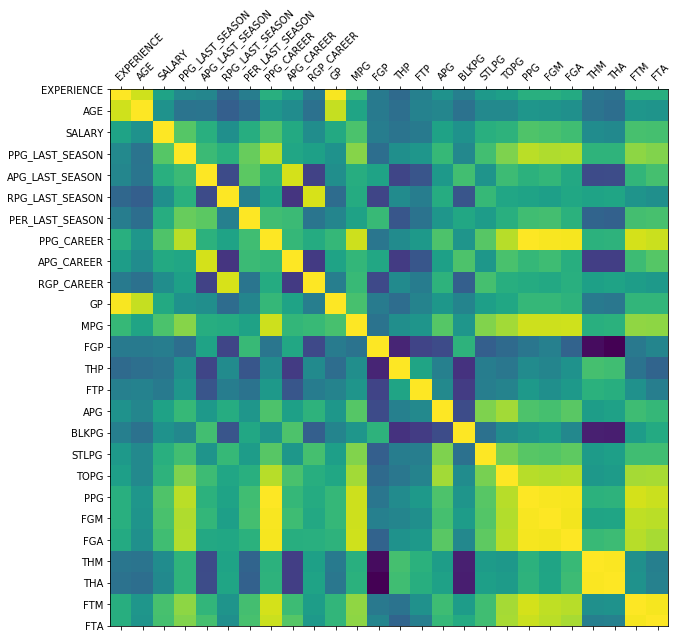

In [32]:
# Criando o gráfico
plot_corr(nba)

In [33]:
corr_nba = nba.corr()

In [34]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
corr_nba['SALARY'].sort_values(ascending=False) # Ordenando a coluna, variavel alvo

SALARY            1.0
PPG_LAST_SEASON   0.6
PPG               0.6
PPG_CAREER        0.6
MPG               0.6
FGM               0.6
FTM               0.6
FTA               0.6
FGA               0.6
TOPG              0.5
APG_LAST_SEASON   0.5
STLPG             0.5
PER_LAST_SEASON   0.5
APG_CAREER        0.4
GP                0.4
EXPERIENCE        0.4
APG               0.4
BLKPG             0.3
AGE               0.3
RPG_LAST_SEASON   0.3
RGP_CAREER        0.3
THM               0.3
THA               0.3
FGP               0.2
FTP               0.2
THP               0.1
Name: SALARY, dtype: float64

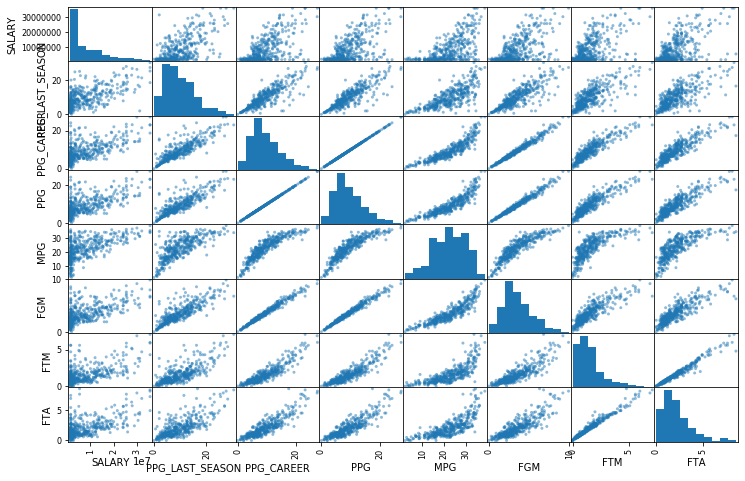

In [35]:
from pandas.plotting import scatter_matrix

# only promising attributes
attributes=['SALARY','PPG_LAST_SEASON','PPG_CAREER','PPG','MPG','FGM','FTM','FTA']
g=scatter_matrix(nba[attributes],figsize=(12,8))

## Pipeline para atributos numéricos e categóricos

In [36]:
nba.columns

Index(['EXPERIENCE', 'POSITION', 'AGE', 'SALARY', 'PPG_LAST_SEASON',
       'APG_LAST_SEASON', 'RPG_LAST_SEASON', 'PER_LAST_SEASON', 'PPG_CAREER',
       'APG_CAREER', 'RGP_CAREER', 'GP', 'MPG', 'FGP', 'THP', 'FTP', 'APG',
       'BLKPG', 'STLPG', 'TOPG', 'PPG', 'FGM', 'FGA', 'THM', 'THA', 'FTM',
       'FTA'],
      dtype='object')

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

    
nba_attribs=['PPG_LAST_SEASON','PPG_CAREER','MPG','PPG','FGM','FTM','FTA']


nba_cat=['POSITION']

nba_pipeline=Pipeline([('imputer', SimpleImputer(strategy = "mean")),
                                      ('scaler', StandardScaler())])

nba_cat_pipeline=Pipeline([('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
                         ('encoder', OneHotEncoder(sparse=False))])

nba_full_pipeline=ColumnTransformer(transformers=[('nba_pipeline', nba_pipeline, nba_attribs),
                                              ('nba_cat_pipeline', nba_cat_pipeline, nba_cat)])



## Conjunto de Validação de Dados - Treino 60% , Validação 20% e Teste 20%

In [58]:
from sklearn.model_selection import train_test_split

test_size=0.2 
random_state=42 


x_colunas =['SALARY', 'POSITION'] 
y_colunas =['SALARY']

x_nba = nba[nba.columns.difference(x_colunas)]
y_nba = nba[y_colunas]

scalery = StandardScaler().fit(y_nba)

x_nba_normalizado = nba_full_pipeline.fit_transform(nba)
y_nba_normalizado = scalery.fit_transform(y_nba)


X_train, X_test, Y_train, Y_test = train_test_split(x_nba_normalizado, y_nba_normalizado, test_size=0.33, random_state=100)
X = X_train 
Y = Y_train




#strat_train_set0,strat_test_set0=train_test_split(x_nba_normalizado,
#                                                  y_nba_normalizado,
#                                                 test_size=test_size,
#                                                  random_state=random_state)
                                    

#valid_size=0.25 
#random_state=24 
#strat_train_set0,strat_valid_set0=train_test_split(strat_train_set0,
#                                                   test_size=valid_size,
#                                                   random_state=random_state)

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

LR = LinearRegression() 
LR.fit(X, Y)
score = LR.score(X,Y)

y_pred = LR.predict(X_test) #mean_absolute_error

mae = mean_absolute_error(Y_test, y_pred)

print(f"Score :{score} e Erro absoluto médio: {mae}")

Score :0.4789533378903986 e Erro absoluto médio: 0.6003641429908525


In [62]:
y_pred

array([[-0.05160407],
       [-0.2455444 ],
       [-0.42608963],
       [ 0.32000106],
       [ 1.43799499],
       [ 0.2242608 ],
       [ 0.73353319],
       [-0.08975661],
       [-0.17827404],
       [-0.20022583],
       [ 0.74316895],
       [ 0.81930897],
       [-0.0377962 ],
       [-0.5893284 ],
       [-0.3093136 ],
       [-1.56284809],
       [-0.68778542],
       [ 1.903248  ],
       [-0.56607587],
       [-1.35396735],
       [-0.36540327],
       [-0.28988791],
       [-0.37002951],
       [-0.28713663],
       [ 0.47547423],
       [-1.34609552],
       [-0.11408852],
       [-0.07731743],
       [-0.10207451],
       [-0.14619543],
       [ 1.34201199],
       [ 0.38786784],
       [ 0.02712735],
       [-0.63648669],
       [ 0.67519152],
       [-1.00316156],
       [-0.91924583],
       [ 1.61755944],
       [-0.0771941 ],
       [ 1.74050349],
       [-0.42768019],
       [-0.3402297 ],
       [ 0.42037467],
       [-0.80910604],
       [-0.81287981],
       [ 0

### Definindo variaveis para o treino

In [41]:
X_treino = strat_train_set0.drop('SALARY',axis=1) # X
y_treino = strat_train_set0['SALARY'].copy() # y
X_treino_prepared = nba_full_pipeline.fit_transform(X_treino) # X

### Definindo variaveis para Validação

In [42]:
X_val = strat_valid_set0.drop('SALARY',axis=1) # X
y_val = strat_valid_set0['SALARY'].copy() # y
X_val_prepared = nba_full_pipeline.fit_transform(X_val) # X

### Definindo variaveis para o teste

In [43]:
X_teste_prepared = nba_full_pipeline.fit_transform(X_teste) # X

#### Treinando o modelo

In [44]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X_treino_prepared,y_treino)

LinearRegression()

In [45]:
from sklearn.metrics import mean_squared_error

nba_predicted=lin_reg.predict(X_treino_prepared)
lin_reg_rmse=np.sqrt(mean_squared_error(y_treino,nba_predicted))

print(lin_reg_rmse) 

5766994.652629862


In [46]:
from sklearn.model_selection import cross_val_score

lin_reg=LinearRegression()
scores=cross_val_score(lin_reg,
                       X_treino_prepared,
                       y_treino,
                       scoring='neg_mean_squared_error',
                       cv=4) 

lin_reg_rmse_score=np.sqrt(-scores) 

print(lin_reg_rmse_score)
print(lin_reg_rmse_score.mean())
print(lin_reg_rmse_score.std())

[5863337.2475375  7385209.96657124 6374694.72801632 5541898.85014082]
6291285.198066468
697916.16539058


### Validando o Modelo

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X_val_prepared,y_val)


LinearRegression()

In [55]:
from sklearn.metrics import mean_squared_error

nba_val_predicted=lin_reg.predict(X_val_prepared)
lin_reg_rmse=np.sqrt(mean_squared_error(y_val,nba_val_predicted))

print(lin_reg_rmse) 

5027329.795978516


In [56]:
from sklearn.model_selection import cross_val_score

lin_reg=LinearRegression()
scores=cross_val_score(lin_reg,
                       X_val_prepared,
                       y_val,
                       scoring='neg_mean_squared_error',
                       cv=4) 

lin_reg_rmse_score=np.sqrt(-scores) 

print(lin_reg_rmse_score)
print(lin_reg_rmse_score.mean())
print(lin_reg_rmse_score.std())

[5304406.85760579 6239360.44226176 7147841.57060562 6453392.93622624]
6286250.4516748525
658879.9933522771


### Testando o modelo

In [59]:
from sklearn.linear_model import LinearRegression


ynew = lin_reg.predict(X_teste_prepared)


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Prevendo o valor alvo de novas instâncias com o modelo treinado

### Segundo o modelo, o salário correto do Stephen Curry seria : 26.389.430,45 e não 37.457.154.00.
